### Задание

Открыть файл `vgsales.csv`. Данный DataFrame содержит информацию о суммарных продажах видеоигр для игровых консолей. 
Описание признаков:
* `Rank` - порядковый номер записи в DataFrame
* `Name` - наименование игры
* `Platform` - платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и др.)
* `Year` - год выпуска игры
* `Genre` - жанр игры
* `Publisher` - наименование компании-издателя игры
* `NA_Sales` - объем продаж игры в Северной Америке, млн. копий
* `EU_Sales` - объем продаж игры в Европе, млн. копий
* `JP_Sales` - объем продаж игры в Японии, млн. копий
* `Other_Sales` - объем продаж игры в остальных странах, млн. копий
* `Global_Sales` - объем продаж игры по всему миру, млн. копий

In [17]:
# 1 - Открываем файл

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('vgsales.csv')
df['Year'] = df['Year'].astype('Int64')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


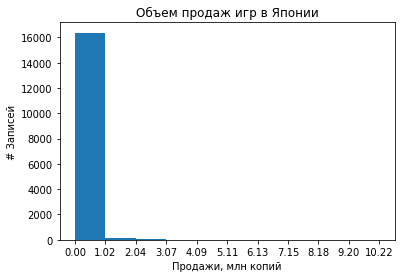

In [5]:
# 2 - Постройте гистограмму распределения объема продаж всех игр в Японии

his = df['JP_Sales']
bt = his.max() / 10
x_range = [i * bt for i in range(11)]

plt.hist(his, bins=10)
plt.title('Объем продаж игр в Японии')
plt.xlabel('Продажи, млн копий')
plt.ylabel('# Записей')
plt.xticks(x_range)

plt.show()

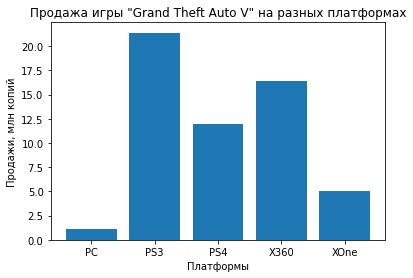

In [6]:
# 3 - Постройте столбчатую диаграмму, показывающую сравнение
# общемирового объема продаж игры "Grand Theft Auto V" на разных платформах

barc = df[df['Name'] == 'Grand Theft Auto V'][['Platform', 'Global_Sales']].sort_values(['Platform'])

plt.bar(barc['Platform'], barc['Global_Sales'])

plt.title('Продажа игры "Grand Theft Auto V" на разных платформах')
plt.xlabel('Платформы')
plt.ylabel('Продажи, млн копий')

plt.show()

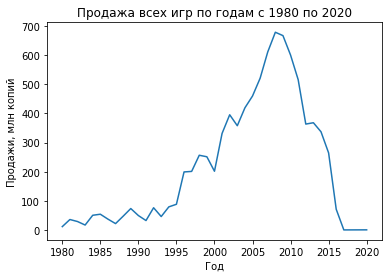

In [7]:
# 4 - Постройте линейный график динамики суммарных общемировых продаж всех игр по годам

lin = df.groupby('Year')['Global_Sales'].sum()

plt.title('Продажа всех игр по годам с 1980 по 2020')
plt.xlabel('Год')
plt.ylabel('Продажи, млн копий')
plt.plot(lin)

plt.show()

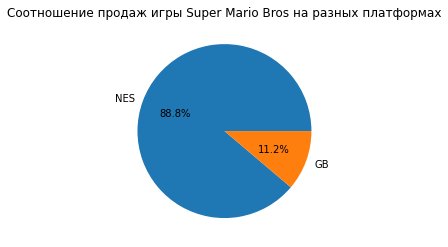

In [8]:
# 5 - Постройте круговую диаграмму процентного соотношения продаж игры "Super Mario Bros."
# на разных платформах во всем мире. Подпишите доли графика с точностью 1 знак после запятой

pies = df[df['Name'] == 'Super Mario Bros.'][['Platform', 'Global_Sales']]

plt.pie(pies['Global_Sales'], labels=pies['Platform'], autopct='%1.1f%%')
plt.title("Соотношение продаж игры Super Mario Bros на разных платформах")

plt.show()

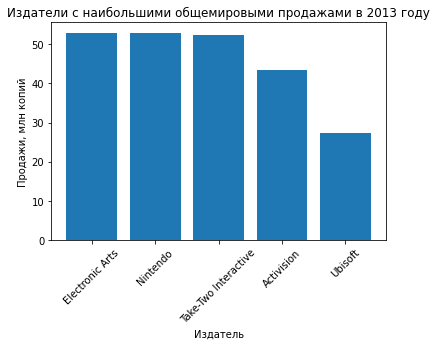

In [9]:
# 6 - Определите 5 издателей, имеющих наибольшие суммарные продажи во всем мире в 2013 году
# и проиллюстрируйте величину их продаж на столбчатой гистограмме

bars = df[df['Year'] == 2013].groupby('Publisher')['Global_Sales'].sum().nlargest(5)

plt.bar(bars.index, bars)

plt.title("Издатели с наибольшими общемировыми продажами в 2013 году")
plt.ylabel('Продажи, млн копий')
plt.xlabel('Издатель')
plt.xticks(bars.index, rotation=45)

plt.show()

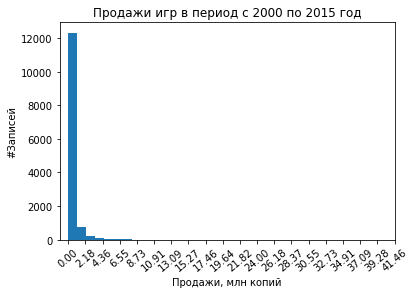

In [10]:
# 7 - Постройте гистограмму распределения величины общемировых продаж игр, 
# выпущенных не издателем Nintendo, в период с 2000 по 2015 год включительно. 
# Гистограмма для большей точности должна содержать 20 столбцов, 
# отсечки на оси X должны соответствовать границам столбцов

df2 = df[(df['Publisher'] != 'Nintendo') & ((df['Year'] >= 2000) & (df['Year'] <= 2015))]['Global_Sales']
plt.hist(df2, bins=19)
bi = df2.max() / 10
x_range = [i * bi for i in range(20)]

plt.title('Продажи игр в период с 2000 по 2015 год')
plt.xlabel('Продажи, млн копий')
plt.ylabel('#Записей')
plt.xticks(x_range, rotation = 40)

plt.show()

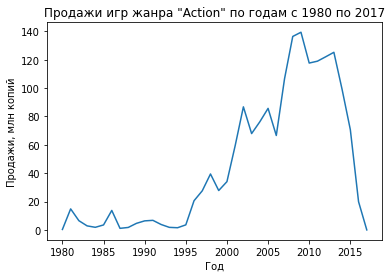

In [11]:
# 8 - Постройте линейный график динамики суммарных мировых продаж игр жанра "Action" по годам

lin2 = df[df['Genre'] == 'Action'].groupby('Year')['Global_Sales'].sum()

plt.title('Продажи игр жанра "Action" по годам с 1980 по 2017')
plt.xlabel('Год')
plt.ylabel('Продажи, млн копий')
plt.plot(lin2)

plt.show()

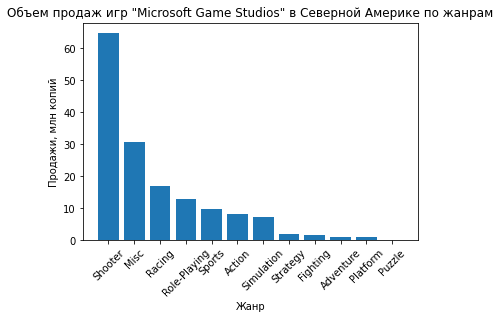

In [12]:
# 9 - С помощью столбчатой диаграммы проиллюстрируйте объем продаж всех игр
# издателя "Microsoft Game Studios" в Северной Америке за все время в зависимости от жанра.
# Столбцы расположите по убыванию

data = df[df['Publisher'] == 'Microsoft Game Studios'].groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False)

plt.bar(data.index, data)
plt.xticks(data.index, rotation=45)
plt.title('Объем продаж игр "Microsoft Game Studios" в Северной Америке по жанрам')
plt.ylabel('Продажи, млн копий')
plt.xlabel('Жанр')

plt.show()

#### 10

Одной из основных задач при анализе данных является проверка данных на корректность и отсутствие ошибок. В датасете "vgsales" одним из потенциальных источников ошибок является столбец с общемировыми продажами. По идее, значение общемировых продаж какой-либо игры должно равняться сумме продаж в Северной Америке, Европе, Японии и остальных странах, в противном случае мы получим ошибку в данных, которая может негативно повлиять на весь дальнейший процесс анализа.

Причин возникновения такой ошибки может быть несколько. Давайте рассмотрим следующие причины:

Ошибка округления. В целом, такая ошибка достаточно часто встречается при переводе величин из одних единиц в другие (например, из тысяч копий в миллионы копий).
Ошибка вычислений. Такая ситуация требует более серьезного исследования, поскольку она может привести к недостоверным результатам анализа данных.
Будем считать, что в записи имеется ошибка суммирования, если сумма продаж какой-либо игры в Северной Америке, Европе, Японии и остальных странах отличается от общемировых продаж более, чем на 0.01 млн копий.

С помощью круговой диаграммы проиллюстрируйте процент записей в датасете, имеющих такую ошибку суммирования продаж

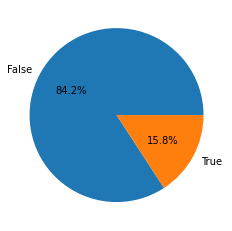

In [13]:
df['HasError'] = (df['Global_Sales'] - df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)).abs() > 0.01
data = df['HasError'].value_counts()

plt.pie(data, labels=data.index, autopct='%1.1f%%')

plt.show()

### Задача 11

Постройте линейный график динамики объема продаж всех игр жанра "Sports" в Японии. Задайте графику размер 12 на 6

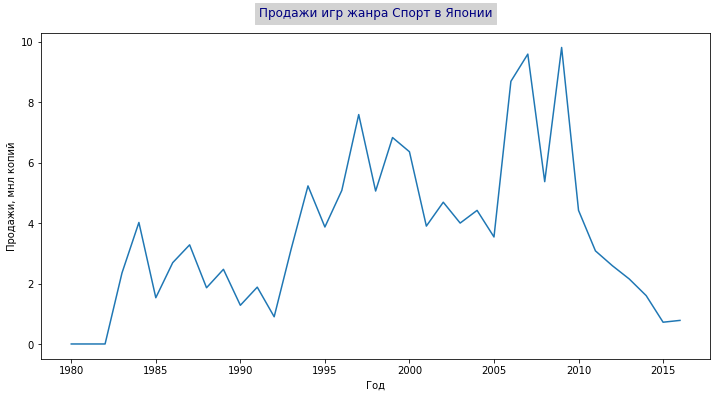

In [14]:
lin = df[df['Genre'] == 'Sports'].groupby('Year')['JP_Sales'].sum()

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(lin)
ax.set_title('Продажи игр жанра Спорт в Японии', pad=16, color='navy', backgroundcolor='lightgray')
ax.set_xlabel('Год')
ax.set_ylabel('Продажи, мнл копий')

plt.show()

### Задача 12

В одних координатных осях постройте линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и во всем мире

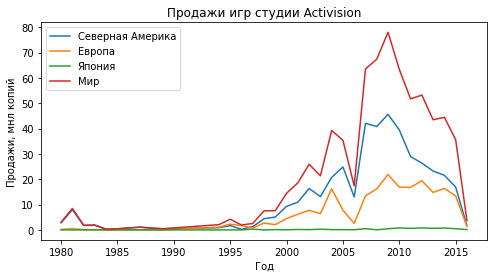

In [15]:
NA = df[df['Publisher'] == 'Activision'].groupby('Year')['NA_Sales'].sum()
EU = df[df['Publisher'] == 'Activision'].groupby('Year')['EU_Sales'].sum()
JP = df[df['Publisher'] == 'Activision'].groupby('Year')['JP_Sales'].sum()
Global = df[df['Publisher'] == 'Activision'].groupby('Year')['Global_Sales'].sum()

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(NA, label = 'Северная Америка')
ax.plot(EU, label = 'Европа')
ax.plot(JP, label = 'Япония')
ax.plot(Global, label = 'Мир')

ax.set_title('Продажи игр студии Activision')
ax.set_xlabel('Год')
ax.set_ylabel('Продажи, мнл копий')
ax.legend()

plt.show()

### Задача 13

В цикле (т.е. на разных координатных осях) постройте линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире

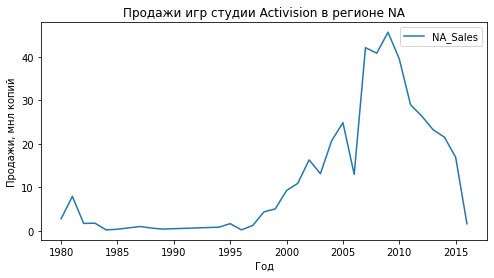

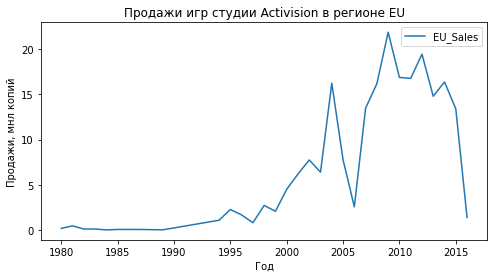

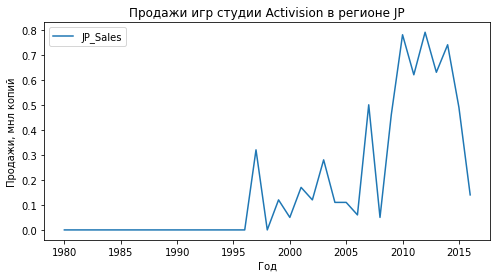

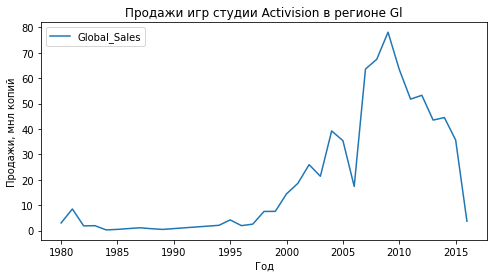

In [18]:
for i in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']:
    lin2 = df[df['Publisher'] == 'Activision'].groupby('Year')[[i]].sum()
    
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.lineplot(data=lin2, x="Year", y=i, label=i)

    ax.set_title(f'Продажи игр студии Activision в регионе {i[0:2]}')
    ax.set_xlabel('Год')
    ax.set_ylabel('Продажи, мнл копий')

plt.show()

### Задача 14

Постройте такие же линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире на одном полотне в сетке 2 на 2 графика. Итоговое полотно сделайте размером 12 на 12. Все графики должны разделять оси X и Y

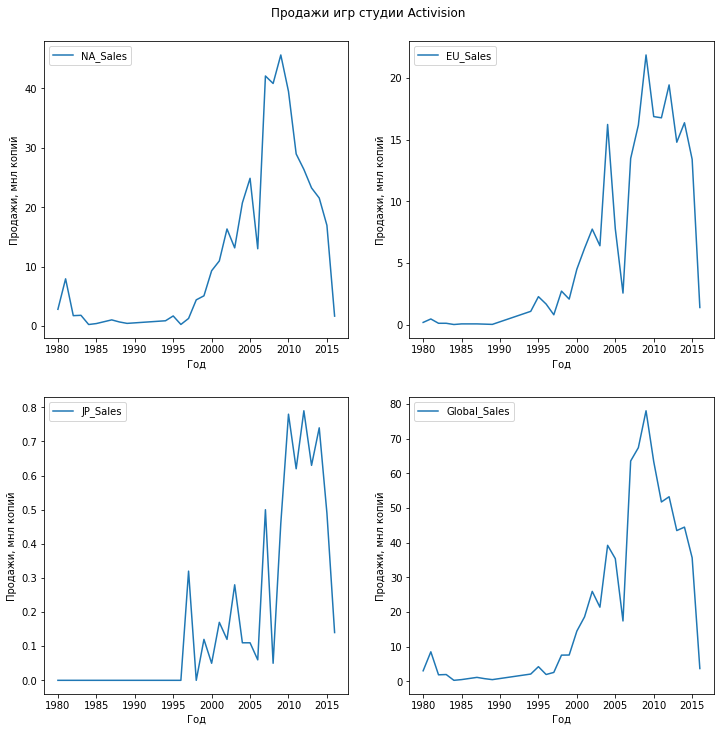

In [19]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']

for i, ax in enumerate(axs.ravel()):
    lin3 = df[df['Publisher'] == 'Activision'].groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']].sum()
    
    ax.plot(lin3.index, lin3[cols[i]], label=cols[i])
    ax.set_xlabel('Год')
    ax.set_ylabel('Продажи, мнл копий')
    ax.legend()

fig.suptitle('Продажи игр студии Activision', y=0.92)
plt.show()

### Задача 15

В одной координатной сетке постройте 2 гистограммы распределения мировых продаж игр издателей "Microsoft Game Studios" и "Take-Two Interactive" после 2010 года (включая 2010 год). Графики сделайте полупрозрачными, отсечки должны быть общими и соответствовать ширине столбцов обоих графиков

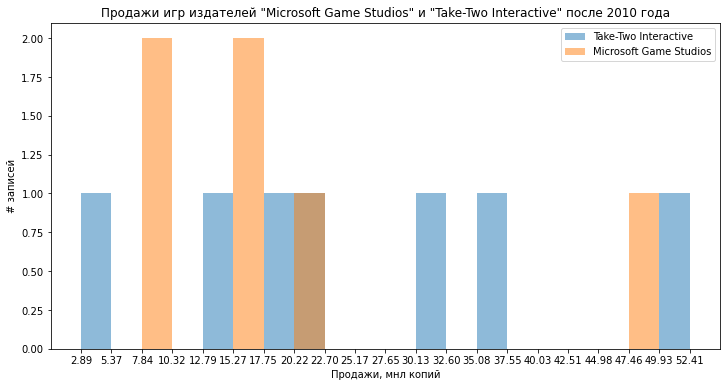

In [20]:
df1 = df[(df['Publisher'] == 'Microsoft Game Studios') & (df['Year'] >= 2010)].groupby('Year')['Global_Sales'].sum()
df2 = df[(df['Publisher'] == 'Take-Two Interactive') & (df['Year'] >= 2010)].groupby('Year')['Global_Sales'].sum()

fig, ax = plt.subplots(figsize=(12, 6))

_,bins,_ = ax.hist(df2, label='Take-Two Interactive', alpha=0.5, bins=20)
ax.hist(df1, label='Microsoft Game Studios', alpha=0.5, bins=bins)

ax.set_title('Продажи игр издателей "Microsoft Game Studios" и "Take-Two Interactive" после 2010 года')
ax.set_xlabel('Продажи, мнл копий')
ax.set_ylabel('# записей')
ax.set_xticks(bins)
ax.legend()

plt.show()

### Задача 16

Определите 5 платформ, для которых в Японии было продано больше всего игр за все время. Проиллюстрируйте величину продаж на столбчатой диаграмме, столбец с самым высоким значением окрасьте зеленым, а с самым низким - красным

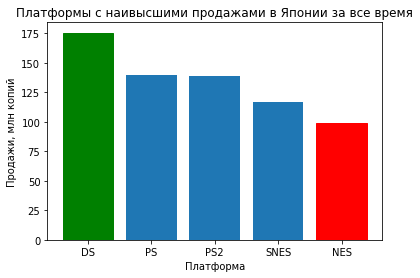

In [21]:
plat = df.groupby('Platform')['JP_Sales'].sum().nlargest(5)

fig, ax = plt.subplots()

patches = ax.bar(plat.index, plat)
patches.patches[0].set_color('green')
patches.patches[-1].set_color('red')

ax.set_title('Платформы с наивысшими продажами в Японии за все время')
ax.set_xlabel('Платформа')
ax.set_ylabel('Продажи, млн копий')

plt.show()